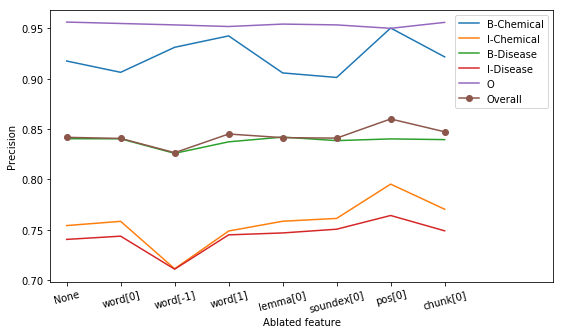

╒═══════════════════╤══════════════╤══════════════╤═════════════╤═════════════╤════════╤═══════════╕
│ Ablated feature   │  B-Chemical  │  I-Chemical  │  B-Disease  │  I-Disease  │   O    │  Overall  │
╞═══════════════════╪══════════════╪══════════════╪═════════════╪═════════════╪════════╪═══════════╡
│ --                │    0.9174    │    0.7543    │   0.8404    │   0.7406    │ 0.9560 │ 0.841760  │
├───────────────────┼──────────────┼──────────────┼─────────────┼─────────────┼────────┼───────────┤
│ word[0]           │    0.9062    │    0.7585    │   0.8403    │   0.7438    │ 0.9546 │ 0.840674  │
├───────────────────┼──────────────┼──────────────┼─────────────┼─────────────┼────────┼───────────┤
│ word[-1]          │    0.9310    │    0.7115    │   0.8259    │   0.7111    │ 0.9532 │ 0.826536  │
├───────────────────┼──────────────┼──────────────┼─────────────┼─────────────┼────────┼───────────┤
│ word[1]           │    0.9423    │    0.7489    │   0.8373    │   0.7451    │ 0.9516 │ 0.

In [44]:
##########################################################################################
# Extracting chemical-disease associations from the biological literature
# R214: Main Practical
# Jan Ondras (jo356), Trinity College
##########################################################################################
# Print tables & Plot graphs from feature ablation experiments: for all 3 measures
# The NER model evaluated on development set
##########################################################################################

####################
# PRECISION
####################

import numpy as np
import matplotlib.pyplot as plt
import time
import glob
from tabulate import tabulate

ablated_features = [
    '--',
    'word[0]',
    'word[-1]',
    'word[1]',
    'lemma[0]',
    'soundex[0]',
    'pos[0]',
    'chunk[0]'
]
ablated_features_plt = np.array(ablated_features)
ablated_features_plt[0] = 'None'

labels = [
    'B-Chemical', 
    'I-Chemical',
    'B-Disease',
    'I-Disease',
    'O',
    'Overall'
]


# Matrices of measures (len(ablated_features), len(labels))

P_mat = np.array([
    [0.9174, 0.7543, 0.8404, 0.7406, 0.9560, 0.841760],
    [0.9062, 0.7585, 0.8403, 0.7438, 0.9546, 0.840674],
    [0.9310, 0.7115, 0.8259, 0.7111, 0.9532, 0.826536],
    [0.9423, 0.7489, 0.8373, 0.7451, 0.9516, 0.845053],
    [0.9056, 0.7586, 0.8420, 0.7470, 0.9540, 0.841452],
    [0.9011, 0.7614, 0.8385, 0.7507, 0.9532, 0.840986],
    [0.9501, 0.7954, 0.8402, 0.7643, 0.9498, 0.859964],
    [0.9215, 0.7705, 0.8395, 0.7491, 0.9557, 0.847258],
])

plt.figure(figsize=(9,5))
xaxis = np.arange(len(ablated_features))
for i in range(len(labels)):
    if i == 5:
        plt.plot(xaxis, P_mat[:,i], 'o-', label=labels[i])
    else:
        plt.plot(xaxis, P_mat[:,i], '-', label=labels[i])

plt.xticks(xaxis, ablated_features_plt, rotation=15)
plt.xlabel('Ablated feature')
plt.ylabel('Precision')
plt.xlim(-0.3, 9)
plt.legend()
plt.show()


tab_header = ['Ablated feature'] + labels
print tabulate(P_mat, 
               headers=tab_header, tablefmt='fancy_grid', showindex=ablated_features,
               numalign='center', floatfmt=(".4f", ".4f", ".4f", ".4f", ".4f", ".4f", ".6f"))
print tabulate(P_mat, 
               headers=tab_header, tablefmt='latex_booktabs', showindex=ablated_features,
               numalign='center', floatfmt=(".4f", ".4f", ".4f", ".4f", ".4f", ".4f", ".6f"))


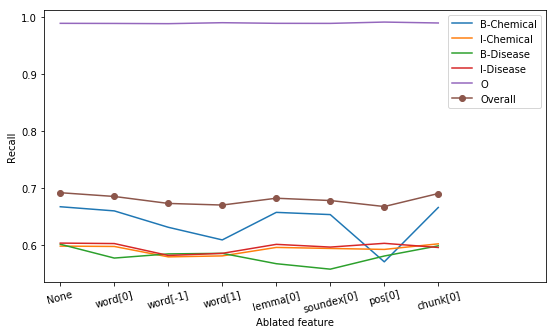

╒═══════════════════╤══════════════╤══════════════╤═════════════╤═════════════╤════════╤═══════════╕
│ Ablated feature   │  B-Chemical  │  I-Chemical  │  B-Disease  │  I-Disease  │   O    │  Overall  │
╞═══════════════════╪══════════════╪══════════════╪═════════════╪═════════════╪════════╪═══════════╡
│ --                │    0.6665    │    0.5973    │   0.6006    │   0.6026    │ 0.9888 │ 0.691157  │
├───────────────────┼──────────────┼──────────────┼─────────────┼─────────────┼────────┼───────────┤
│ word[0]           │    0.6592    │    0.5967    │   0.5763    │   0.6018    │ 0.9886 │ 0.684549  │
├───────────────────┼──────────────┼──────────────┼─────────────┼─────────────┼────────┼───────────┤
│ word[-1]          │    0.6304    │    0.5784    │   0.5836    │   0.5809    │ 0.9882 │ 0.672312  │
├───────────────────┼──────────────┼──────────────┼─────────────┼─────────────┼────────┼───────────┤
│ word[1]           │    0.6082    │    0.5801    │   0.5846    │   0.5846    │ 0.9899 │ 0.

In [45]:
####################
# RECALL
####################

R_mat = np.array([
    [0.6665, 0.5973, 0.6006, 0.6026, 0.9888, 0.691157],
    [0.6592, 0.5967, 0.5763, 0.6018, 0.9886, 0.684549],
    [0.6304, 0.5784, 0.5836, 0.5809, 0.9882, 0.672312],
    [0.6082, 0.5801, 0.5846, 0.5846, 0.9899, 0.669471],
    [0.6566, 0.5950, 0.5664, 0.6004, 0.9888, 0.681448],
    [0.6527, 0.5932, 0.5568, 0.5956, 0.9887, 0.677405],
    [0.5697, 0.5915, 0.5799, 0.6022, 0.9910, 0.666851],
    [0.6652, 0.6013, 0.5978, 0.5949, 0.9894, 0.689717]
])

plt.figure(figsize=(9,5))
xaxis = np.arange(len(ablated_features))
for i in range(len(labels)):
    if i == 5:
        plt.plot(xaxis, R_mat[:,i], 'o-', label=labels[i])
    else:
        plt.plot(xaxis, R_mat[:,i], '-', label=labels[i])
plt.xticks(xaxis, ablated_features_plt, rotation=15)
plt.xlabel('Ablated feature')
plt.ylabel('Recall')
plt.xlim(-0.3, 9)
plt.legend()
plt.show()

tab_header = ['Ablated feature'] + labels
print tabulate(R_mat, 
               headers=tab_header, tablefmt='fancy_grid', showindex=ablated_features,
               numalign='center', floatfmt=(".4f", ".4f", ".4f", ".4f", ".4f", ".4f", ".6f"))
print tabulate(R_mat, 
               headers=tab_header, tablefmt='latex_booktabs', showindex=ablated_features,
               numalign='center', floatfmt=(".4f", ".4f", ".4f", ".4f", ".4f", ".4f", ".6f"))



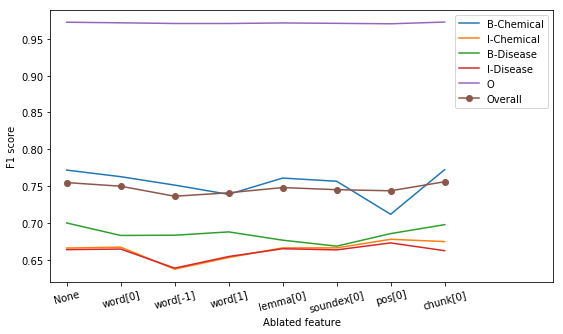

╒═══════════════════╤══════════════╤══════════════╤═════════════╤═════════════╤════════╤═══════════╕
│ Ablated feature   │  B-Chemical  │  I-Chemical  │  B-Disease  │  I-Disease  │   O    │  Overall  │
╞═══════════════════╪══════════════╪══════════════╪═════════════╪═════════════╪════════╪═══════════╡
│ --                │    0.7721    │    0.6667    │   0.7006    │   0.6645    │ 0.9721 │ 0.755196  │
├───────────────────┼──────────────┼──────────────┼─────────────┼─────────────┼────────┼───────────┤
│ word[0]           │    0.7632    │    0.6679    │   0.6837    │   0.6653    │ 0.9713 │ 0.750310  │
├───────────────────┼──────────────┼──────────────┼─────────────┼─────────────┼────────┼───────────┤
│ word[-1]          │    0.7518    │    0.6381    │   0.6840    │   0.6395    │ 0.9704 │ 0.736726  │
├───────────────────┼──────────────┼──────────────┼─────────────┼─────────────┼────────┼───────────┤
│ word[1]           │    0.7393    │    0.6538    │   0.6885    │   0.6552    │ 0.9704 │ 0.

In [46]:
####################
# F1 SCORE
####################

F_mat = np.array([
    [0.7721, 0.6667, 0.7006, 0.6645, 0.9721, 0.755196],
    [0.7632, 0.6679, 0.6837, 0.6653, 0.9713, 0.750310],
    [0.7518, 0.6381, 0.6840, 0.6395, 0.9704, 0.736726],
    [0.7393, 0.6538, 0.6885, 0.6552, 0.9704, 0.741412],
    [0.7613, 0.6669, 0.6773, 0.6657, 0.9711, 0.748454],
    [0.7570, 0.6669, 0.6692, 0.6642, 0.9706, 0.745597],
    [0.7123, 0.6785, 0.6862, 0.6736, 0.9700, 0.744105],
    [0.7727, 0.6754, 0.6983, 0.6631, 0.9723, 0.756366]
])

plt.figure(figsize=(9,5))
xaxis = np.arange(len(ablated_features))
for i in range(len(labels)):
    if i == 5:
        plt.plot(xaxis, F_mat[:,i], 'o-', label=labels[i])
    else:
        plt.plot(xaxis, F_mat[:,i], '-', label=labels[i])
plt.xticks(xaxis, ablated_features_plt, rotation=15)
plt.xlabel('Ablated feature')
plt.ylabel('F1 score')
plt.xlim(-0.3, 9)
plt.legend()
plt.show()


tab_header = ['Ablated feature'] + labels
print tabulate(F_mat, 
               headers=tab_header, tablefmt='fancy_grid', showindex=ablated_features,
               numalign='center', floatfmt=(".4f", ".4f", ".4f", ".4f", ".4f", ".4f", ".6f"))
print tabulate(F_mat, 
               headers=tab_header, tablefmt='latex_booktabs', showindex=ablated_features,
               numalign='center', floatfmt=(".4f", ".4f", ".4f", ".4f", ".4f", ".4f", ".6f"))
